In [1]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath('script'))


In [54]:
import eda
import plot
import importlib
import outliers

In [24]:
df = pd.read_csv(
    "data/MachineLearningRating_v3.txt",
    sep='|',
    engine="python"
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [29]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity                 0.055195
kilowatts                

In [25]:
df = df.drop(columns=['NumberOfVehiclesInFleet', 'CrossBorder'])

In [26]:
df['CustomValueEstimate'].sample(10)
df['CVE_Is_Missing'] = df['CustomValueEstimate'].isnull().astype(int)
df['CustomValueEstimate'] = df['CustomValueEstimate'].fillna(-1)

In [27]:
flag_columns = ['WrittenOff', 'Rebuilt', 'Converted']
df[flag_columns] = df[flag_columns].fillna("No")

In [28]:
df['Bank'] = df['Bank'].fillna('Unknown')

In [29]:
df['NewVehicle'] = df['NewVehicle'].fillna(df['NewVehicle'].mode()[0])

In [9]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

UnderwrittenCoverID         0.000000
PolicyID                    0.000000
TransactionMonth            0.000000
IsVATRegistered             0.000000
Citizenship                 0.000000
LegalType                   0.000000
Title                       0.000000
Language                    0.000000
Bank                        0.000000
AccountType                 4.022806
MaritalStatus               0.825819
Gender                      0.953507
Country                     0.000000
Province                    0.000000
PostalCode                  0.000000
MainCrestaZone              0.000000
SubCrestaZone               0.000000
ItemType                    0.000000
mmcode                      0.055195
VehicleType                 0.055195
RegistrationYear            0.000000
make                        0.055195
Model                       0.055195
Cylinders                   0.055195
cubiccapacity               0.055195
kilowatts                   0.055195
bodytype                    0.055195
N

### overall Loss Ratio (TotalClaims / TotalPremium)

In [13]:
total_claim = df['TotalClaims'].sum()
total_premium = df['TotalPremium'].sum()


overall_loss_ratio = (total_claim / total_premium) * 100
print(f"Total Portfolio Claims: {total_claim:,.2f}")
print(f"Total Portfolio Premium: {total_premium:,.2f}")
print(f"Overall Portfolio Loss Ratio: {overall_loss_ratio:.2f}%")

Total Portfolio Claims: 64,867,546.17
Total Portfolio Premium: 61,911,562.70
Overall Portfolio Loss Ratio: 104.77%


In [55]:
importlib.reload(eda)

col_list = ['Province', 'VehicleType', 'Gender']
e = eda.EDA(df)
for col in col_list:
    analysis = e.LR_analysis(col)
    print(f"{col} overall Loss Ratio (TotalClaims / TotalPremium)")
    print("\n")
    print(analysis)

Province overall Loss Ratio (TotalClaims / TotalPremium)


               Total Claims  Total Premium  Loss Ratio (%)
Province                                                  
Gauteng        2.939415e+07   2.405377e+07      122.201812
KwaZulu-Natal  1.430138e+07   1.320908e+07      108.269332
Western Cape   1.038977e+07   9.806559e+06      105.947196
North West     5.920250e+06   7.490508e+06       79.036694
Mpumalanga     2.044675e+06   2.836292e+06       72.089735
Free State     3.549223e+05   5.213632e+05       68.075814
Limpopo        1.016477e+06   1.537324e+06       66.119854
Eastern Cape   1.356427e+06   2.140104e+06       63.381348
Northern Cape  8.949051e+04   3.165581e+05       28.269855
VehicleType overall Loss Ratio (TotalClaims / TotalPremium)


                   Total Claims  Total Premium  Loss Ratio (%)
VehicleType                                                   
Heavy Commercial   7.504746e+05   4.609479e+05      162.811164
Medium Commercial  4.119867e+06   3.92274

### outliers

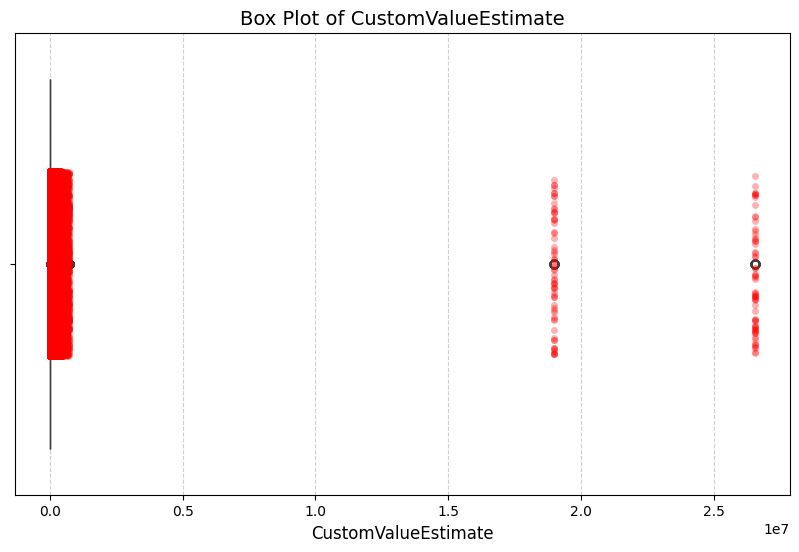

In [32]:
importlib.reload(plot)
plot = plot.Plot(df)
plot.plot_box_plot('CustomValueEstimate')

In [33]:
importlib.reload(outliers)
outlier = outliers.Outliers(df)

df = outlier.remove_outliers('CustomValueEstimate')

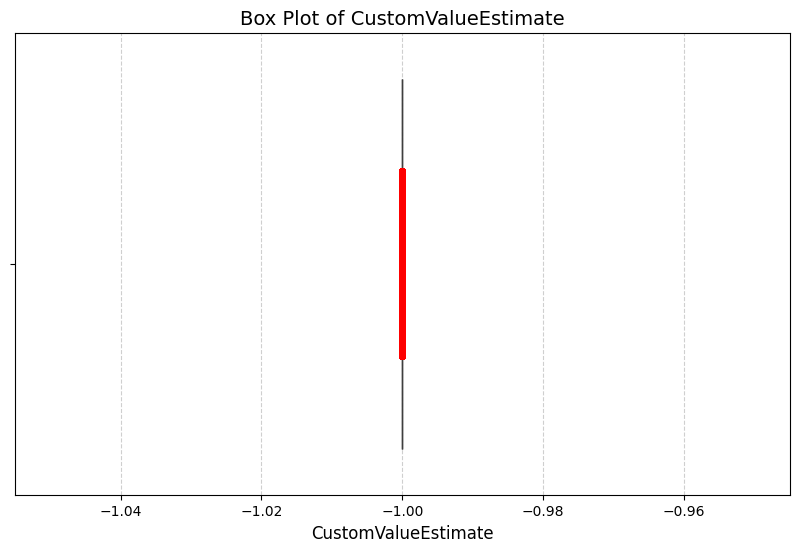

In [34]:
plot.plot_box_plot('CustomValueEstimate')

### temporal trends

In [41]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['TransactionMonth']
df_date = df.groupby('TransactionMonth')
total_claims_mean = df_date['TotalClaims'].mean()
total_claims_mean

TransactionMonth
2013-10-01     0.000000
2013-11-01    42.295217
2013-12-01     6.209623
2014-01-01     6.807258
2014-02-01    30.547676
2014-03-01    93.128973
2014-04-01    44.350859
2014-05-01    54.622811
2014-06-01    42.677753
2014-07-01    28.777234
2014-08-01    35.331688
2014-09-01    34.971237
2014-10-01    52.178981
2014-11-01    78.640464
2014-12-01    99.868279
2015-01-01    76.764888
2015-02-01    75.334178
2015-03-01    81.236553
2015-04-01    93.998999
2015-05-01    69.702195
2015-06-01    60.473143
2015-07-01    64.826388
2015-08-01     9.553607
Name: TotalClaims, dtype: float64

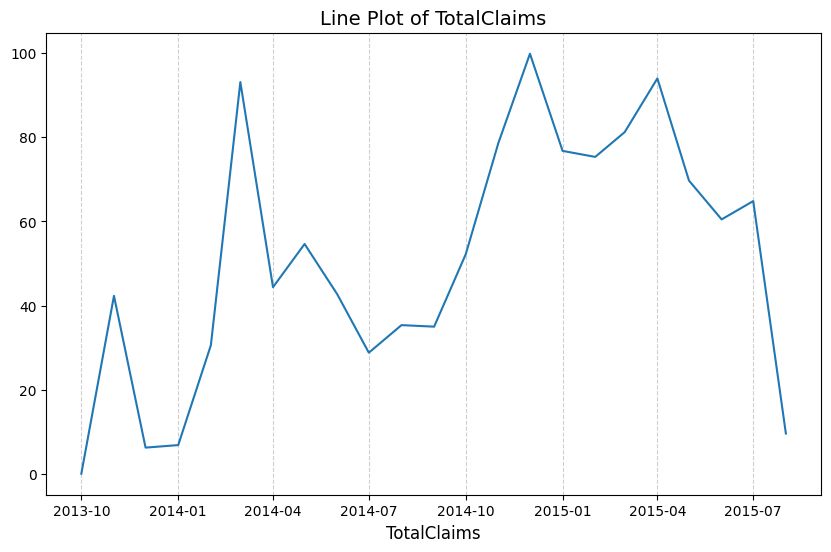

In [64]:
importlib.reload(plot)
p = plot.Plot(df)
p.plot_line_plot(total_claims_mean)

Province overall Loss Ratio (TotalClaims / TotalPremium)


               Total Claims  Total Premium  Loss Ratio (%)
Province                                                  
Gauteng        2.939415e+07   2.405377e+07      122.201812
KwaZulu-Natal  1.430138e+07   1.320908e+07      108.269332
Western Cape   1.038977e+07   9.806559e+06      105.947196
North West     5.920250e+06   7.490508e+06       79.036694
Mpumalanga     2.044675e+06   2.836292e+06       72.089735
Free State     3.549223e+05   5.213632e+05       68.075814
Limpopo        1.016477e+06   1.537324e+06       66.119854
Eastern Cape   1.356427e+06   2.140104e+06       63.381348
Northern Cape  8.949051e+04   3.165581e+05       28.269855


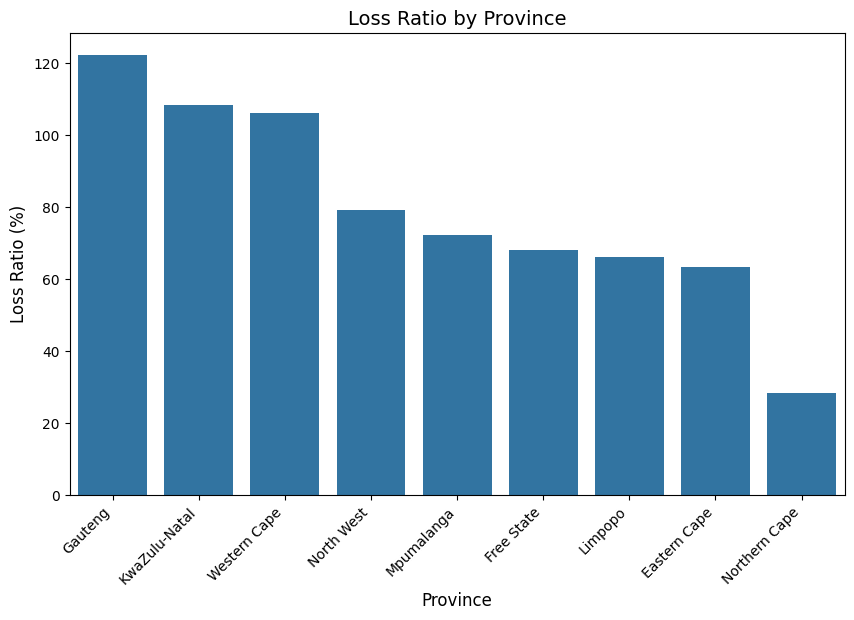

In [63]:
province_analysis = e.LR_analysis('Province')
p.plot_bar_analysis(province_analysis, 'Province')

### Distribution Analysis

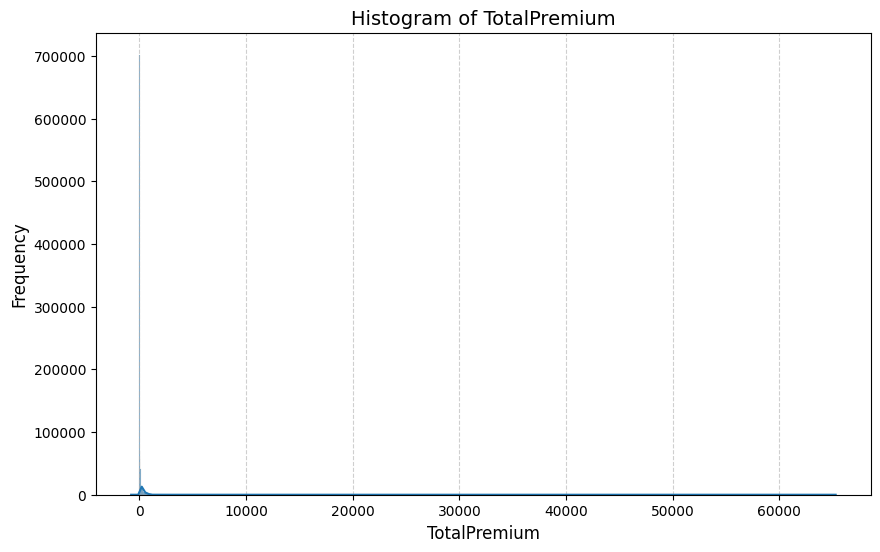

In [65]:
p.plot_histo_gram('TotalPremium')